In [1]:
#@title file uploader from drive
!pip install -U -q PyDrive



file_list = ["1k-BDbuqoMTvDEm4lgRQZcpWid4xCDEgO",
         "1PsChD6Yio0Eb_ZctQBSUX9wl1O4Qa89t",
         "1r8uGf8oGU2Mhar1VCb4PPuZDF8-RCJt1"
         ]

      
# all models phoneme classification
# 1k-BDbuqoMTvDEm4lgRQZcpWid4xCDEgO
# us all phonemes train test data
# 1PsChD6Yio0Eb_ZctQBSUX9wl1O4Qa89t
# spec all phonemes train test data
# 1r8uGf8oGU2Mhar1VCb4PPuZDF8-RCJt1

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')


import io
from googleapiclient.http import MediaIoBaseDownload

for file_id in file_list: 
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
  print(fileId['title'])  
  fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

#!unzip {fileId['title']}


all_models.zip
us_all_train_test.zip
spec_all_train_test.zip


In [ ]:
!unzip /content/all_models.zip -d /content/all_models
!unzip /content/spec_all_train_test.zip -d /content/spec_all_train_test
!unzip /content/us_all_train_test.zip -d /content/us_all_train_test

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.utils import img_to_array,load_img,array_to_img


from keras.preprocessing.image import DirectoryIterator,DataFrameIterator
import numpy as np



path_us_train = "/content/us_all_train_test/train"
path_us_test = "/content/us_all_train_test/test"


h = 96
w = 96
# timesteps = 3

################ US images ##############

datagen = ImageDataGenerator(
    rotation_range=2,
width_shift_range=2.0,
height_shift_range=2.0,
brightness_range=(10,5),
shear_range=5.0,
zoom_range=5.0,
channel_shift_range=5.0  
)

train_generator_us = datagen.flow_from_directory(path_us_train,class_mode='categorical', color_mode ='grayscale', shuffle = False, target_size =(h,w),subset='training')

datagen_test = ImageDataGenerator()

test_generator_us = datagen_test.flow_from_directory(path_us_test,class_mode='categorical',color_mode ='grayscale',shuffle = False,  target_size =(h,w),subset='training')

################ Spectrogram images ##############


spec_datagen = ImageDataGenerator()

h = 96
w = 96

path_spec_train = "/content/spec_all_train_test/train"
path_spec_test = "/content/spec_all_train_test/test"



train_generator_spec = spec_datagen.flow_from_directory(path_spec_train,class_mode='categorical', color_mode ='rgb', shuffle = False, target_size =(h,w),subset='training')

spec_datagen_test = ImageDataGenerator(
    rotation_range=2,
width_shift_range=2.0,
height_shift_range=2.0,
brightness_range=(10,5),
shear_range=5.0,
zoom_range=5.0,
channel_shift_range=5.0  
)

test_generator_spec = spec_datagen_test.flow_from_directory(path_spec_test,class_mode='categorical',color_mode ='rgb',shuffle = False,  target_size =(h,w),subset='training')







Found 8787 images belonging to 6 classes.
Found 4395 images belonging to 6 classes.
Found 2929 images belonging to 6 classes.
Found 1465 images belonging to 6 classes.


In [4]:
def load_data_from_generators(generator,timestep,color_mode ='grayscale',target_size =(96,96)):

    data_frames = []

    dat_labels = [];

    # just2see = 0

    for i in range(0,len(generator.filepaths),timestep):

        time_dist_data = []

        for k in range(timestep):
            # print(generator.filepaths[i+k])
            time_dist_data.append(img_to_array(load_img(generator.filepaths[i+k],color_mode=color_mode,target_size=target_size)))

        dat_labels.append(generator.labels[i])

        data_frames.append(time_dist_data)

        # if(just2see == 100):
        #   break

        # just2see = just2see + 1 

    return np.array(data_frames),np.array(dat_labels)

train_us_data,train_labels_us = load_data_from_generators(train_generator_us,timestep=3)

test_us_data,test_labels_us = load_data_from_generators(test_generator_us,timestep=3)

train_spec_data,train_labels_spec = load_data_from_generators(train_generator_spec,timestep=1,color_mode='rgb')

test_spec_data,test_labels_spec = load_data_from_generators(test_generator_spec,timestep=1,color_mode='rgb')

# print(train_us_data.shape)
# print(test_us_data.shape)

train_spec_data = np.squeeze(train_spec_data)

print(train_spec_data.shape)

test_spec_data = np.squeeze(test_spec_data)

print(test_spec_data.shape)

train_labels_us = tf.keras.utils.to_categorical(train_labels_us)

test_labels_us  =tf.keras.utils.to_categorical(test_labels_us)


train_labels_spec = tf.keras.utils.to_categorical(train_labels_spec)

test_labels_spec  =tf.keras.utils.to_categorical(test_labels_spec)

print(train_labels_spec.shape)
print(test_labels_spec.shape)
print(train_labels_us.shape)
print(test_labels_us.shape)


(2929, 96, 96, 3)
(1465, 96, 96, 3)
(2929, 6)
(1465, 6)
(2929, 6)
(1465, 6)


In [5]:
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dense,Flatten,TimeDistributed, Conv3D,MaxPooling3D, Concatenate
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.callbacks import  History
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv1D,BatchNormalization,MaxPool1D,Dense,Flatten,TimeDistributed
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import LSTM,Bidirectional
from keras.models import Sequential
from keras.layers import Conv1D,BatchNormalization,MaxPool1D,Dense,Flatten,TimeDistributed
# from keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import model_from_json

def get_loaded_model_by_name(filename):
  # load json and create model
  json_file = open(f'all_models/{filename}.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  loaded_model = model_from_json(loaded_model_json)
  # load weights into new model
  loaded_model.load_weights(f'all_models/{filename}.h5')
  print("Loaded model from disk")
  # print(loaded_model.summary())
  return loaded_model

def save_model_by_model_and_filename(model, filename):
  model_json = model.to_json()
  with open(f'{filename}.json', "w") as json_file:
    json_file.write(model_json)
  model.save_weights(f'{filename}.h5')
  print("Saved model to disk")

def label_mapping(color_labels):
  print(color_labels)
  color_labels =  np.where(color_labels == "0", "d", color_labels)
  color_labels =  np.where(color_labels == "2", "k", color_labels)
  color_labels =  np.where(color_labels == "1", "g", color_labels)
  color_labels =  np.where(color_labels == "4", "t", color_labels)
  color_labels =  np.where(color_labels == "3", "s", color_labels)
  color_labels =  np.where(color_labels == "5", "z", color_labels)
  return color_labels



def label_vowel_mapping(color_labels):
  # print(color_labels)
  color_labels =  np.where(color_labels == "0", "a_", color_labels)
  color_labels =  np.where(color_labels == "1", "e_", color_labels)
  color_labels =  np.where(color_labels == "2", "i_", color_labels)
  color_labels =  np.where(color_labels == "3", "ii", color_labels)
  color_labels =  np.where(color_labels == "4", "o_", color_labels)
  color_labels =  np.where(color_labels == "5", "oo", color_labels)
  color_labels =  np.where(color_labels == "6", "u_", color_labels)
  color_labels =  np.where(color_labels == "7", "uu", color_labels)

  return color_labels

import warnings
warnings.filterwarnings('ignore')

In [130]:
index = np.random.choice(train_us_data.shape[0],5, replace=False)
index

array([1540, 1976, 2832, 1823, 2070])

In [6]:
from keras import backend as K
import numpy as np 
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px # for data visualization

 
def get_samples(data,label,size = 1000, index = 0, end = 100):
  n = size
  i = [n for n in range(index, end, 1)]
  data_random = data[i]
  label_random = label[i]
  return data_random,label_random

def get_samples_multi_input(data_us,label_us, data_spec, label_spec,size = 1000 , index = 0, end = 100):
  n = size
  # index = np.random.choice(data_us.shape[0], n, replace=False)
  i = [n for n in range(index, end, 1)]
  data_random_us = data_us[i]
  label_random_us = label_us[i]
  data_random_spec = data_spec[i]
  label_random_spec = label_spec[i]
  return data_random_us,label_random_us, data_random_spec, label_random_spec

def frequencies_list(list_):
  (unique, counts) = np.unique(list_, return_counts=True)
  frequencies = np.asarray((unique, counts)).T
  return frequencies

def frequencies_list_with_max_cnt_index(list_):
  (unique, counts) = np.unique(list_, return_counts=True)
  frequencies = np.asarray((unique, counts)).T
  max_count_index = frequencies[np.where(counts == max(counts))]
  return frequencies, max_count_index


def frequencies(np_labels):
  np_inverted_labels = decodedOneHot(np_labels)
  (unique, counts) = np.unique(np_inverted_labels, return_counts=True)
  frequencies = np.asarray((unique, counts)).T
  return frequencies

def decodedOneHot(np_labels):
  inverted = np.argmax(np_labels,axis=1)
  return inverted

def get_shape_by_model(model):
  model_name = model
  if model_name == "model_us_spec_all_phonemes" or model_name=="model_spec_with96vectors_all_phonemes":
    shape_data = (100,96)
    shape_label = (100,6)
  else:
    shape_data = (100,64)
    shape_label = (100,6)
  return shape_data, shape_label



import plotly.graph_objs as go
from plotly.offline import plot

def get_layer_output_data_and_label( test_us_data, test_labels_us, loaded_model, test_spec_data = None, test_labels_spec = None,index_of_layer = -2, sample_size = 100, model_name="model_us_spec_all_phonemes",index = 0, end = 100):
 
  is_multi_input = False
  print("model name:{}".format(model_name))
  if model_name == "model_us_spec_all_phonemes":
    is_multi_input = True
    tsne_data_us, tsne_label_us, tsne_data_spec, tsne_label_spec = get_samples_multi_input(test_us_data, test_labels_us, test_spec_data, test_labels_spec,sample_size,index,end)
  elif model_name == "model_us_all_phonemes":
    tsne_data_us, tsne_label_us = get_samples(test_us_data, test_labels_us, sample_size)
    print(tsne_data_us.shape)
  elif model_name == "model_spec_all_phonemes" or model_name=="model_spec_with96vectors_all_phonemes":
    tsne_data_spec, tsne_label_spec = get_samples(test_spec_data, test_labels_spec, sample_size,index,end)
    print(tsne_data_spec.shape)
    print("comes here 1 ")
  elif model_name == "model_base_fair_all_phonemes":
    tsne_data_us, tsne_label_us = get_samples(test_us_data, test_labels_us, sample_size)

  else:
    print("model not found")

  func = K.function([loaded_model.input], [loaded_model.layers[index_of_layer].output])

  print("IS MULTI INPUT: {}".format(is_multi_input))
  if is_multi_input:
    outputs = func([tsne_data_us, tsne_data_spec])
  else:
    if model_name == "model_us_all_phonemes" or model_name == "model_base_fair_all_phonemes":
      outputs = func([tsne_data_us])
    elif model_name == "model_spec_all_phonemes" or model_name=="model_spec_with96vectors_all_phonemes":
      print(tsne_data_spec.shape)
      print("comes here 2 ")
      tsne_data_spec = tsne_data_spec.reshape(100, 1, tsne_data_spec.shape[1], tsne_data_spec.shape[2], tsne_data_spec.shape[3])
      print("comes here 3 ")
      outputs = func([tsne_data_spec])
      print("comes here 4 ")
  out_arr = np.array(outputs,dtype=np.float64)
  print("comes here 5 ")
  out_arr = out_arr.reshape(out_arr.shape[1], out_arr.shape[2])
  print("comes here 6 ")
  # print("out_arr.shape: {}".format(out_arr.shape))
  if is_multi_input or model_name == "model_us_all_phonemes" or model_name == "model_base_fair_all_phonemes":
    print("comes here 7 ")
    return out_arr, tsne_label_us
  else:
    print("comes here 8 ")
    print("tsne_label_spec shape {}", tsne_label_spec.shape)
    
    # out_lab = tf.keras.utils.to_categorical(tsne_label_spec)
    # print("out_lab shape: {}",out_lab)
    return out_arr, tsne_label_spec

def display_tsne(X_embedded, labels, is_analogy = False):

  if (is_analogy == False):
    color_labels = decodedOneHot(labels).astype(str)
  else: 
    color_labels = labels.astype(str)

  phonetics = label_mapping(color_labels)
  fig = px.scatter(None, x=X_embedded[:,0], y=X_embedded[:,1], 
                  labels={
                      "x": "Dimension 1",
                      "y": "Dimension 2",
                  },
                  opacity=1, color=phonetics)

  # Change chart background color
  fig.update_layout(dict(plot_bgcolor = 'white'))

  # Update axes lines
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                  zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                  showline=True, linewidth=1, linecolor='black')

  fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                  zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                  showline=True, linewidth=1, linecolor='black')

  # Set figure title
  fig.update_layout(title_text="t-SNE")

  # Update marker size
  fig.update_traces(marker=dict(size=3))

  fig.show()





In [7]:
def get_embedding_us_spec_results_train():
 
    model_name ="model_us_spec_all_phonemes"

  # ["model_us_spec_all_phonemes","model_spec_all_phonemes","model_us_all_phonemes"]

    shape_data, shape_label = get_shape_by_model(model_name)
    embedding_vectors_list = np.zeros((shape_data), dtype=float)
    embedding_labels = np.zeros((shape_label))


    # output layer display
    loaded_model = get_loaded_model_by_name(model_name)
    # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model,train_spec_data, train_labels_spec, sample_size = 100,model_name = model_name)
    # # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model, sample_size = 100)


    for i in range(29):
      index = i * 100
      end = index + 100
      out_arr_test, labels_test = get_layer_output_data_and_label( train_us_data, train_labels_us, loaded_model,train_spec_data, train_labels_spec, sample_size = 100,  model_name = model_name,index = index, end = end)
      # out_arr_test, labels_test = get_layer_output_data_and_label(test_us_data, test_labels_us, loaded_model,test_spec_data, test_labels_spec, sample_size = 100,model_name = model_name)
      embedding_vectors_list = np.append(embedding_vectors_list, out_arr_test, axis=0)
      embedding_labels = np.append(embedding_labels, labels_test, axis=0)

    newlist_embedding_labels = embedding_labels[100:]
    newlist_embedding_vectors_list = embedding_vectors_list[100:]
    embedding_vectors = TSNE(n_components=2,init='random').fit_transform(newlist_embedding_vectors_list)
    print("labelsshape: {}".format( newlist_embedding_labels.shape))
    # display_tsne(embedding_vectors, embedding_labels)

    return newlist_embedding_vectors_list, newlist_embedding_labels, embedding_vectors


def get_embedding_spec_results_train():
 
    model_name ="model_spec_with96vectors_all_phonemes"

  # ["model_us_spec_all_phonemes","model_spec_all_phonemes","model_us_all_phonemes"]

    shape_data, shape_label = get_shape_by_model(model_name)
    embedding_vectors_list = np.zeros((shape_data), dtype=float)
    embedding_labels = np.zeros((shape_label))
    # print(embedding_labels)

    # output layer display
    loaded_model = get_loaded_model_by_name(model_name)
    # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model,train_spec_data, train_labels_spec, sample_size = 100,model_name = model_name)
    # # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model, sample_size = 100)


    for i in range(29):
      index = i * 100
      end = index + 100
      out_arr_test, labels_test = get_layer_output_data_and_label( train_us_data, train_labels_us, loaded_model,train_spec_data, train_labels_spec, sample_size = 100, model_name = model_name,index = index, end = end)
      # out_arr_test, labels_test = get_layer_output_data_and_label(test_us_data, test_labels_us, loaded_model,test_spec_data, test_labels_spec, sample_size = 100,model_name = model_name)
      # print(labels_test)
      embedding_vectors_list = np.append(embedding_vectors_list, out_arr_test, axis=0)
      embedding_labels = np.append(embedding_labels, labels_test, axis=0)

    newlist_embedding_labels = embedding_labels[100:]
    newlist_embedding_vectors_list = embedding_vectors_list[100:]
    embedding_vectors = TSNE(n_components=2,init='random').fit_transform(newlist_embedding_vectors_list)
    print("labelsshape: {}".format( newlist_embedding_labels.shape))
    # display_tsne(embedding_vectors, embedding_labels)

    return newlist_embedding_vectors_list, newlist_embedding_labels, embedding_vectors
 
 



def get_embedding_us_spec_results():
 
    model_name ="model_us_spec_all_phonemes"

  # ["model_us_spec_all_phonemes","model_spec_all_phonemes","model_us_all_phonemes"]

    shape_data, shape_label = get_shape_by_model(model_name)
    embedding_vectors_list = np.zeros((shape_data), dtype=float)
    embedding_labels = np.zeros((shape_label))


    # output layer display
    loaded_model = get_loaded_model_by_name(model_name)
    # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model,train_spec_data, train_labels_spec, sample_size = 100,model_name = model_name)
    # # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model, sample_size = 100)


    for i in range(14):
      index = i * 100
      end = index + 100
      out_arr_test, labels_test = get_layer_output_data_and_label(test_us_data, test_labels_us, loaded_model,test_spec_data, test_labels_spec, sample_size = 100,model_name = model_name,index = index, end = end)
      # out_arr_test, labels_test = get_layer_output_data_and_label(test_us_data, test_labels_us, loaded_model,test_spec_data, test_labels_spec, sample_size = 100,model_name = model_name)
      embedding_vectors_list = np.append(embedding_vectors_list, out_arr_test, axis=0)
      embedding_labels = np.append(embedding_labels, labels_test, axis=0)

    newlist_embedding_labels = embedding_labels[100:]
    newlist_embedding_vectors_list = embedding_vectors_list[100:]
    embedding_vectors = TSNE(n_components=2,init='random').fit_transform(newlist_embedding_vectors_list)
    print("labelsshape: {}".format( newlist_embedding_labels.shape))
    # display_tsne(embedding_vectors, embedding_labels)

    return newlist_embedding_vectors_list, newlist_embedding_labels, embedding_vectors


def get_embedding_spec_results():
 
    model_name ="model_spec_with96vectors_all_phonemes"

  # ["model_us_spec_all_phonemes","model_spec_all_phonemes","model_us_all_phonemes"]

    shape_data, shape_label = get_shape_by_model(model_name)
    embedding_vectors_list = np.zeros((shape_data), dtype=float)
    embedding_labels = np.zeros((shape_label))
    # print(embedding_labels)

    # output layer display
    loaded_model = get_loaded_model_by_name(model_name)
    # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model,train_spec_data, train_labels_spec, sample_size = 100,model_name = model_name)
    # # out_arr, labels = get_layer_output_data_and_label(train_us_data, train_labels_us, loaded_model, sample_size = 100)


    for i in range(14):
      index = i * 100
      end = index + 100
      out_arr_test, labels_test = get_layer_output_data_and_label(test_us_data, test_labels_us, loaded_model,test_spec_data, test_labels_spec, sample_size = 100, model_name = model_name,index = index, end = end)
      # out_arr_test, labels_test = get_layer_output_data_and_label(test_us_data, test_labels_us, loaded_model,test_spec_data, test_labels_spec, sample_size = 100,model_name = model_name)
      # print(labels_test)
      embedding_vectors_list = np.append(embedding_vectors_list, out_arr_test, axis=0)
      embedding_labels = np.append(embedding_labels, labels_test, axis=0)

    newlist_embedding_labels = embedding_labels[100:]
    newlist_embedding_vectors_list = embedding_vectors_list[100:]
    embedding_vectors = TSNE(n_components=2,init='random').fit_transform(newlist_embedding_vectors_list)
    print("labelsshape: {}".format( newlist_embedding_labels.shape))
    # display_tsne(embedding_vectors, embedding_labels)

    return newlist_embedding_vectors_list, newlist_embedding_labels, embedding_vectors

In [11]:
spec_us_embedding_vectors_train, spec_us_labels_train, spec_us_embedding_vectors_train_tsne = get_embedding_us_spec_results_train()  
spec_embedding_vectors_train, spec_labels_train, spec_embedding_vectors_train_tsne = get_embedding_spec_results_train()
  
spec_us_embedding_vectors_test, spec_us_labels_test, spec_us_embedding_vectors_tsne = get_embedding_us_spec_results()  
spec_embedding_vectors_test, spec_labels_test, spec_embedding_vectors_tsne = get_embedding_spec_results()
  


Loaded model from disk
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes her

Loaded model from disk
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96v

Loaded model from disk
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes here 5 
comes here 6 
comes here 7 
model name:model_us_spec_all_phonemes
IS MULTI INPUT: True
comes her

Loaded model from disk
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96vectors_all_phonemes
(100, 96, 96, 3)
comes here 1 
IS MULTI INPUT: False
(100, 96, 96, 3)
comes here 2 
comes here 3 
comes here 4 
comes here 5 
comes here 6 
comes here 8 
tsne_label_spec shape {} (100, 6)
model name:model_spec_with96v

In [12]:
# print(decodedOneHot(spec_us_labels_train))
# decodedOneHot(spec_labels_train)


from collections import Counter

# words = ['a', 'b', 'c', 'a']

print(Counter(decodedOneHot(spec_us_labels_train)).keys()) # equals to list(set(words))
print(Counter(decodedOneHot(spec_us_labels_train)).values())

print(Counter(decodedOneHot(spec_labels_train)).keys()) # equals to list(set(words))
print(Counter(decodedOneHot(spec_labels_train)).values())

print(Counter(decodedOneHot(spec_labels_test)).keys()) # equals to list(set(words))
print(Counter(decodedOneHot(spec_labels_test)).values())

print(Counter(decodedOneHot(spec_us_labels_test)).keys()) # equals to list(set(words))
print(Counter(decodedOneHot(spec_us_labels_test)).values())

# n = size
# index = np.random.choice(data.shape[0], n, replace=False)
# data_random = data[index]
# label_random = label[index]
# return data_random,label_random



dict_keys([0, 1, 2, 3, 4, 5])
dict_values([515, 290, 635, 445, 591, 424])
dict_keys([0, 1, 2, 3, 4, 5])
dict_values([515, 290, 635, 445, 591, 424])
dict_keys([0, 1, 2, 3, 4, 5])
dict_values([271, 154, 345, 232, 278, 120])
dict_keys([0, 1, 2, 3, 4, 5])
dict_values([271, 154, 345, 232, 278, 120])


In [143]:
np.savetxt("spec_us_embedding_vectors",spec_us_embedding_vectors_test)
np.savetxt("spec_embedding_vectors",spec_embedding_vectors_test)
np.savetxt("spec_us_labels",spec_us_labels_test)
np.savetxt("spec_labels",spec_labels_test)
np.savetxt("spec_us_embedding_vectors_train",spec_us_embedding_vectors_train)
np.savetxt("spec_embedding_vectors_train",spec_embedding_vectors_train)
np.savetxt("spec_us_labels_train",spec_us_labels_train)
np.savetxt("spec_labels_train",spec_labels_train)


# Tsne

In [13]:
display_tsne(spec_us_embedding_vectors_train_tsne, spec_us_labels_train)
display_tsne(spec_embedding_vectors_train_tsne, spec_labels_train)

display_tsne(spec_us_embedding_vectors_tsne, spec_us_labels_test)
display_tsne(spec_embedding_vectors_tsne, spec_labels_test)

['0' '0' '0' ... '5' '5' '5']


['0' '0' '0' ... '5' '5' '5']


['0' '0' '0' ... '5' '5' '5']


['0' '0' '0' ... '5' '5' '5']


# Normalization


In [79]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def DeNormalizeData(data):
    return (data - np.min(data)) * (np.max(data) - np.min(data))


# normalization train spec vectors 
norm_spec_embedding_vectors_train = NormalizeData(spec_embedding_vectors_train)

# normalization train spec us   
norm_spec_us_embedding_vectors_train = NormalizeData(spec_us_embedding_vectors_train)

# normalization test spec vectors 
norm_spec_embedding_vectors_test = NormalizeData(spec_embedding_vectors_test)

# normalization test spec us vectors
norm_spec_us_embedding_vectors_test = NormalizeData(spec_us_embedding_vectors_test)






# Autoencoder complex

In [96]:
import keras
from keras import layers
from keras import regularizers
encoding_dim = 96  

input_img = keras.Input(shape=(96,))


# "encoded" is the encoded representation of the inputs
encoded = Dense(encoding_dim * 20, activation='relu')(input_img)
encoded = Dense(encoding_dim * 10, activation='relu')(encoded)
encoded = Dense(encoding_dim * 8, activation='relu')(encoded)
encoded = Dense(encoding_dim * 4, activation='relu')(encoded)
encoded = Dense(encoding_dim * 2, activation='relu')(encoded)
encoded = Dense(encoding_dim * 2, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(encoding_dim * 2, activation='relu')(encoded)
decoded = Dense(encoding_dim * 2, activation='relu')(encoded)
decoded = Dense(encoding_dim * 4, activation='relu')(encoded)
decoded = Dense(encoding_dim * 8, activation='relu')(encoded)
decoded = Dense(encoding_dim * 10, activation='relu')(encoded)
decoded = Dense(encoding_dim * 20, activation='relu')(decoded)
decoded = Dense(96, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Separate Encoder model

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Separate Decoder model

# create a placeholder for an encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim, ))
# retrieve the layers of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))



autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# autoencoder.fit(spec_embedding_vectors_train, spec_us_embedding_vectors_train,
#                 epochs=100,
#                 batch_size=100,
#                 shuffle=True,
#                 validation_data=(spec_embedding_vectors_test, spec_us_embedding_vectors_test))

# with normalization 
# autoencoder.fit(norm_spec_embedding_vectors_train, norm_spec_us_embedding_vectors_train,
#                 epochs=100,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(norm_spec_embedding_vectors_test, norm_spec_us_embedding_vectors_test))


autoencoder.fit(norm_spec_embedding_vectors_train, norm_spec_us_embedding_vectors_train,
                epochs=100,
                batch_size=512,
                shuffle=True,
                validation_data=(norm_spec_embedding_vectors_test, norm_spec_us_embedding_vectors_test))



Epoch 1/100
6/6 [==============================] - 6s 49ms/step - loss: 0.5908 - val_loss: 0.3654
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3469 - val_loss: 0.2953
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 0.3141 - val_loss: 0.2939
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3060 - val_loss: 0.2758
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.2977 - val_loss: 0.2714
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.2944 - val_loss: 0.2758
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2928 - val_loss: 0.2681
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 0.2914 - val_loss: 0.2678
Epoch 9/100
6/6 [==============================] - 0s 15ms/step - loss: 0.2912 - val_loss: 0.2697
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2907 - val_loss: 0.2695
Epoch 11/100
6/6 [=

In [97]:
#normalization denormalization problemleri olabilir.!!

encoded_imgs = encoder.predict(spec_embedding_vectors_test)

decoded_imgs = decoder.predict(encoded_imgs)


decoded_imgs.shape


decoded_imgs
loaded_model = get_loaded_model_by_name("model_us_spec_all_phonemes")

# loaded_model = get_loaded_model_by_name("model_spec_with96vectors_all_phonemes")
loaded_model.layers

# out = [layer.output for layer in loaded_model.layers]            # all layer outputs

func = K.function([loaded_model.get_layer('dense_2').input], [loaded_model.get_layer('dense_2').output])

# # d, g, k, s, t, z
# # 0, 1, 2, 3, 4, 5
decoded_denorm = DeNormalizeData(decoded_imgs)

output_classes = func([decoded_denorm])
print(output_classes)

novel_predictions = np.argmax(output_classes[0],axis=1)
novel_predictions

44/44 [==============================] - 0s 1ms/step


Loaded model from disk
[array([[0.19865176, 0.17460291, 0.14283204, 0.15070394, 0.16657811,
        0.16663119],
       [0.19894822, 0.17346989, 0.14594117, 0.15157433, 0.17588377,
        0.15418263],
       [0.19994642, 0.17367767, 0.14234777, 0.15076023, 0.16947882,
        0.16378905],
       ...,
       [0.18501145, 0.15663162, 0.13859661, 0.17596605, 0.15193385,
        0.19186036],
       [0.19661671, 0.160009  , 0.13585673, 0.16741395, 0.15721981,
        0.18288381],
       [0.1725736 , 0.1488895 , 0.14012864, 0.20410228, 0.15503612,
        0.17926985]], dtype=float32)]


array([0, 0, 0, ..., 5, 0, 3])

# Autoencoder basic



In [ ]:
import keras
from keras import layers
from keras import regularizers

# This is the size of our encoded representations
encoding_dim = 96  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(96,))
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)


  
decoded = layers.Dense(96, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(norm_spec_embedding_vectors_train, norm_spec_us_embedding_vectors_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(norm_spec_embedding_vectors_test, norm_spec_us_embedding_vectors_test))

In [30]:
#normalization denormalization problemleri olabilir.!!

encoded_imgs = encoder.predict(norm_spec_embedding_vectors_test)

decoded_imgs = decoder.predict(encoded_imgs)


decoded_imgs.shape


decoded_imgs

loaded_model = get_loaded_model_by_name("model_us_spec_all_phonemes")
loaded_model.layers

# out = [layer.output for layer in loaded_model.layers]            # all layer outputs

func = K.function([loaded_model.get_layer('dense_2').input], [loaded_model.get_layer('dense_2').output])

# # d, g, k, s, t, z
# # 0, 1, 2, 3, 4, 5
decoded_denorm = DeNormalizeData(decoded_imgs)

output_classes = func([decoded_denorm])
print(output_classes)

novel_predictions = np.argmax(output_classes[0],axis=1)
novel_predictions

44/44 [==============================] - 0s 1ms/step


Loaded model from disk
[array([[0.1731701 , 0.17840582, 0.15881836, 0.1504134 , 0.161108  ,
        0.17808431],
       [0.18622632, 0.17775048, 0.14155118, 0.15622048, 0.15384763,
        0.1844039 ],
       [0.17716962, 0.17942205, 0.1554873 , 0.14838982, 0.16158557,
        0.17794561],
       ...,
       [0.16176417, 0.14467905, 0.12415964, 0.18579912, 0.13217936,
        0.2514187 ],
       [0.17010292, 0.16110201, 0.13498601, 0.17265613, 0.14138386,
        0.21976905],
       [0.15750527, 0.14070657, 0.1254097 , 0.20305976, 0.13186751,
        0.24145116]], dtype=float32)]


array([1, 0, 1, ..., 5, 5, 5])

# Autoencoder Test

In [ ]:
#normalization denormalization problemleri olabilir.!!

encoded_imgs = encoder.predict(norm_spec_embedding_vectors_test)

norm_encoded_imgs  =  NormalizeData(encoded_imgs)

decoded_imgs = decoder.predict(norm_encoded_imgs)

norm_decoded_imgs = NormalizeData(decoded_imgs)

decoded_imgs.shape

4/4 [==============================] - 0s 4ms/step


(100, 96)

In [ ]:
norm_decoded_imgs

array([[0.32135987, 0.6104159 , 0.343105  , ..., 0.7786009 , 0.5497549 ,
        0.81666654],
       [0.4199317 , 0.61988544, 0.39124048, ..., 0.7879864 , 0.5481895 ,
        0.7927271 ],
       [0.30858678, 0.57550025, 0.34789196, ..., 0.76301306, 0.56453556,
        0.82379705],
       ...,
       [0.38097063, 0.5992788 , 0.39576423, ..., 0.75646883, 0.5890629 ,
        0.8044348 ],
       [0.31713814, 0.5660286 , 0.36657107, ..., 0.76552707, 0.55615336,
        0.83747095],
       [0.3006423 , 0.5806594 , 0.34051156, ..., 0.78028816, 0.53369653,
        0.84856105]], dtype=float32)

In [ ]:
loaded_model = get_loaded_model_by_name("model_spec_with96vectors_all_phonemes")
loaded_model.layers

# out = [layer.output for layer in loaded_model.layers]            # all layer outputs

func = K.function([loaded_model.get_layer('dense_49').input], [loaded_model.get_layer('dense_49').output])

# # d, g, k, s, t, z
# # 0, 1, 2, 3, 4, 5


output_classes = func([norm_decoded_imgs])
print(output_classes)

novel_predictions = np.argmax(output_classes[0],axis=1)
novel_predictions

# Padding commented

In [ ]:
# # Padding spec vectors with all means

# zeros_arr_train = np.zeros((1100,32), dtype=float)
# zeros_arr_test = np.zeros((800,32), dtype=float)

# mean = np.mean(spec_embedding_vectors_train)
# zeros_arr_train = zeros_arr_train + mean

# spec_embedding_vectors_train_padding = np.copy(spec_embedding_vectors_train)
# spec_embedding_vectors_train_padding = np.concatenate((spec_embedding_vectors_train_padding, zeros_arr_train), axis=1)
# print(spec_embedding_vectors_train_padding.shape)

# mean = np.mean(spec_embedding_vectors)
# zeros_arr_test = zeros_arr_test + mean

# spec_embedding_vectors_test_padding = np.copy(spec_embedding_vectors)
# spec_embedding_vectors_test_padding = np.concatenate((spec_embedding_vectors_test_padding, zeros_arr_test), axis=1)
# spec_embedding_vectors_test_padding.shape


(1100, 96)


(800, 96)

# Ax = b

In [64]:
# train phase  
A = np.copy(norm_spec_embedding_vectors_train)
b = np.copy(norm_spec_us_embedding_vectors_train)

A_norm = (A - np.min(A))/np.ptp(A)
pinv = np.linalg.pinv(A_norm)
x = pinv.dot(b)

# test phase


results = norm_spec_embedding_vectors_test.dot(x)


loaded_model = get_loaded_model_by_name("model_us_spec_all_phonemes")
loaded_model.layers

# out = [layer.output for layer in loaded_model.layers]            # all layer outputs

func = K.function([loaded_model.get_layer('dense_2').input], [loaded_model.get_layer('dense_2').output])

# # d, g, k, s, t, z
# # 0, 1, 2, 3, 4, 5


output_classes = func([DeNormalizeData(results)])
print(output_classes)

novel_predictions = np.argmax(output_classes[0],axis=1)
print(novel_predictions)


Loaded model from disk
[array([[0.1554655 , 0.19852695, 0.1461767 , 0.1544702 , 0.13990201,
        0.20545866],
       [0.16708212, 0.20189537, 0.12790325, 0.1574752 , 0.13648628,
        0.20915778],
       [0.16073729, 0.20029901, 0.13847643, 0.1497411 , 0.14044338,
        0.21030274],
       ...,
       [0.14550698, 0.157548  , 0.10871375, 0.18353553, 0.11980629,
        0.28488952],
       [0.15330969, 0.16638769, 0.11571144, 0.17047036, 0.12415596,
        0.26996478],
       [0.13941503, 0.14422451, 0.10572918, 0.21548922, 0.11415681,
        0.2809852 ]], dtype=float32)]
[5 5 5 ... 5 5 5]


# Confusion matrix

<Axes: >

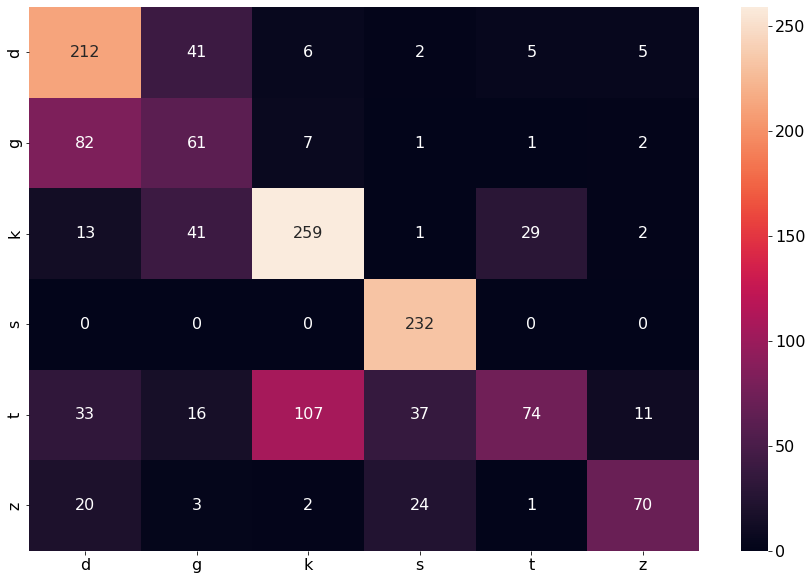

In [98]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ['d', 'g', 'k', 's', 't', 'z']

novel_predictions = np.argmax(output_classes[0],axis=1)
groud_truth = decodedOneHot(spec_labels_test).astype(str)
# groud_truth
cm = confusion_matrix(groud_truth.astype(np.int64),novel_predictions)
fig, ax = plt.subplots(figsize=(15,10))  
plt.rcParams.update({'font.size': 16})
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);
sns.heatmap(cm, annot=True,fmt='d',xticklabels=labels, yticklabels=labels, ax=ax)

In [99]:
import numpy as np
import pandas as pd

tab = pd.crosstab(groud_truth, novel_predictions)
accuracy = np.diag(tab).sum() / tab.to_numpy().sum()

accuracy

0.6485714285714286

# SpectroST yeniden eğittim 96 boyutlu olacak şekilde. Modeli kaydettim.





In [ ]:
# only spec



train_spec_data_reshape  = train_spec_data.reshape( train_spec_data.shape[0], 1, train_spec_data.shape[1],train_spec_data.shape[2], train_spec_data.shape[3] )
test_spec_data_reshape  = test_spec_data.reshape( test_spec_data.shape[0], 1, test_spec_data.shape[1],test_spec_data.shape[2], test_spec_data.shape[3] )

# train_spec_data_reshape.shape
model_s = action_model((tstep,h,w,channel), nbout)

model_s.add(Dense(nbout, activation='softmax'))


opt = SGD(lr=0.01)
# model_drawing(model_s,"SpectroST")
model_s.compile(loss = "categorical_crossentropy", optimizer =opt,metrics=['accuracy'])

model_s.fit(train_spec_data_reshape,train_labels_us, shuffle=True,batch_size=10,validation_data=(test_spec_data_reshape,test_labels_us),epochs =20)

# model_s.fit(train_spec_data_reshape,train_labels_spec,validation_data =(test_spec_data_reshape,test_labels_spec), shuffle=True,batch_size=32,epochs = 100)



Epoch 1/20
293/293 [==============================] - 22s 58ms/step - loss: 1.5351 - accuracy: 0.4223 - val_loss: 1.4159 - val_accuracy: 0.4423
Epoch 2/20
293/293 [==============================] - 16s 54ms/step - loss: 1.2266 - accuracy: 0.5159 - val_loss: 1.0841 - val_accuracy: 0.5638
Epoch 3/20
293/293 [==============================] - 15s 51ms/step - loss: 1.1103 - accuracy: 0.5452 - val_loss: 0.9813 - val_accuracy: 0.6123
Epoch 4/20
293/293 [==============================] - 16s 54ms/step - loss: 1.0231 - accuracy: 0.5801 - val_loss: 0.9634 - val_accuracy: 0.6102
Epoch 5/20
293/293 [==============================] - 16s 54ms/step - loss: 0.9975 - accuracy: 0.5848 - val_loss: 0.8842 - val_accuracy: 0.6471
Epoch 6/20
293/293 [==============================] - 15s 50ms/step - loss: 0.9556 - accuracy: 0.6016 - val_loss: 0.8322 - val_accuracy: 0.6553
Epoch 7/20
293/293 [==============================] - 16s 55ms/step - loss: 0.9223 - accuracy: 0.6074 - val_loss: 1.1847 - val_accuracy:

Evaluate on test data
147/147 [==============================] - 2s 13ms/step - loss: 0.7620 - accuracy: 0.6949
test loss, test acc: [0.7620169520378113, 0.6948805451393127]
46/46 [==============================] - 2s 25ms/step


<Axes: >

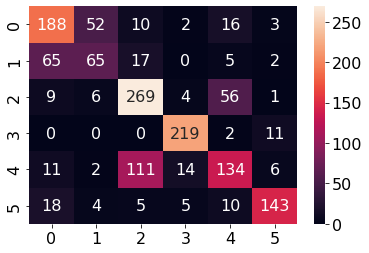

In [ ]:
print("Evaluate on test data")
results = model_s.evaluate(test_spec_data_reshape,test_labels_us, batch_size=10)
print("test loss, test acc:", results)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# d, g, k, s, t, z
# 0, 1, 2, 3, 4, 5

predictions = model_s.predict(test_spec_data_reshape)

y_true = np.argmax(test_labels_us,axis=1)
y_pred = np.argmax(predictions,axis=1)

sns.heatmap(confusion_matrix(y_true,y_pred), annot=True,fmt='d')

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model_s.to_json()
with open("model_spec_with96vectors_all_phonemes.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_s.save_weights("model_spec_with96vectors_all_phonemes.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
nbout = 6
tstep = 1
channel = 3

from keras.layers import TimeDistributed, GRU, Dense, Dropout
def action_model(shape=(tstep, h, w, channel), nbout=2):
    # Create our convnet with (112, 112, 3) input shape
    convnet = build_convnet(shape[1:])
    
    # then create our final model
    model = Sequential()

    # add the convnet with (5, 112, 112, 3) shape
    model.add(TimeDistributed(convnet, input_shape=shape))


    model.add(Bidirectional(LSTM(20, activation='relu')))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(96, activation='relu'))
    # model.add(Dense(nbout, activation='sigmoid'))
    return model

    
def conv2DNet(shape=(h, w, channel)):
    momentum = .9
    model = Sequential()

    model.add(Conv2D(128, (7,7), input_shape=shape, padding='same', activation='relu'))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))

    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))


    # flatten...
    model.add(GlobalMaxPool2D())
    return model
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, GlobalMaxPool2D
def build_convnet(shape=(h, w, channel)):
    momentum = .9
    model = Sequential()

    model.add(Conv2D(128, (7,7), input_shape=shape, padding='same', activation='relu'))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))

    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))

        
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))


    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPool2D())
    model.add(BatchNormalization(momentum=momentum))
    

    # flatten...
    model.add(GlobalMaxPool2D())
    return model